# Install & Import

In [5]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.6 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd

df = pd.read_csv("/kaggle/input/nibsss-fraud-dataset/nibss_fraud_dataset.csv")
df.head()


/tmp/ipykernel_37/4025576018.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/nibsss-fraud-dataset/nibss_fraud_dataset.csv")


,transaction_id,customer_id,timestamp,amount,channel,merchant_category,bank,location,age_group,hour,...,hour_cos,day_sin,day_cos,month_sin,month_cos,amount_log,amount_rounded,velocity_score,merchant_risk_score,composite_risk
0,TXN_F08A86FFD87C,CUST_0002AED1,2023-01-14 04:31:09,32266.83,Mobile,Grocery,Sterling,Other,30-39,4,...,0.500000,-0.974928,-0.222521,0.500000,0.866025,10.381826,0,0.189369,0.215000,0.070560
1,TXN_C2D08134EC83,CUST_0002AED1,2023-01-17 11:20:13,72530.49,Web,Entertainment,UBA,Other,30-39,11,...,-0.965926,0.781831,0.623490,0.500000,0.866025,11.191776,0,0.425671,0.877424,0.276849
2,TXN_B9499111901D,CUST_0002AED1,2023-01-22 02:17:46,168152.87,Mobile,Transport,Wema,Other,30-39,2,...,0.866025,-0.781831,0.623490,0.500000,0.866025,12.032635,0,0.986866,0.440230,0.163649
3,TXN_48DB1D526A3B,CUST_0002AED1,2023-01-24 08:18:23,16439.93,Mobile,Entertainment,FCMB,Other,30-39,8,...,-0.500000,0.781831,0.623490,0.500000,0.866025,9.707529,0,0.096484,0.877424,0.266315
4,TXN_56DB1E28B758,CUST_0002AED1,2023-02-01 15:39:53,9922.68,POS,Education,FirstBank,Other,30-39,15,...,-0.707107,0.974928,-0.222521,0.866025,0.500000,9.202679,0,0.058235,0.231291,0.071251


# Training

## Visualise Graph

In [138]:
df.columns

Index(['transaction_id', 'customer_id', 'timestamp', 'amount', 'channel',
       'merchant_category', 'bank', 'location', 'age_group', 'hour',
       'day_of_week', 'month', 'is_weekend', 'is_peak_hour', 'tx_count_24h',
       'amount_sum_24h', 'amount_mean_7d', 'amount_std_7d', 'tx_count_total',
       'amount_mean_total', 'amount_std_total', 'channel_diversity',
       'location_diversity', 'amount_vs_mean_ratio', 'online_channel_ratio',
       'is_fraud', 'fraud_technique', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos', 'month_sin', 'month_cos', 'amount_log', 'amount_rounded',
       'velocity_score', 'merchant_risk_score', 'composite_risk'],
      dtype='object')

Text(0.5, 1.0, 'Fraud Count by Transaction Channel')

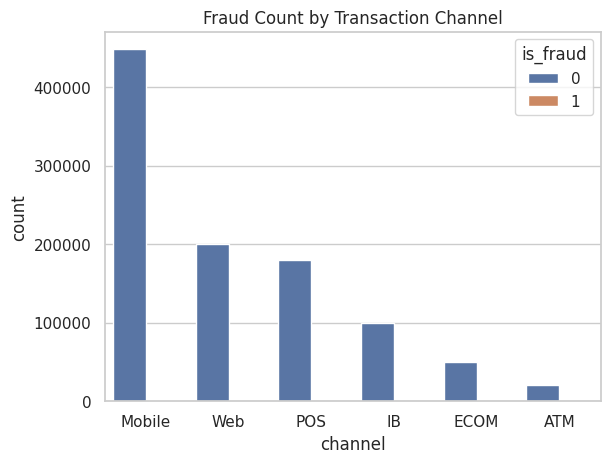

In [124]:
sns.countplot(data=df, x='channel', hue='is_fraud')
plt.title("Fraud Count by Transaction Channel")

Text(0.5, 1.0, 'Distribution of Fraud Techniques')

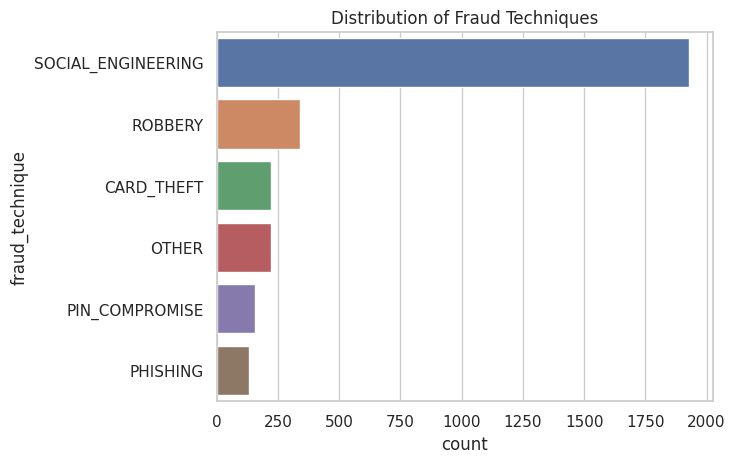

In [126]:
sns.countplot(data=df, y='fraud_technique', order=df['fraud_technique'].value_counts().index)
plt.title("Distribution of Fraud Techniques")

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


Text(0.5, 1.0, 'Fraud Rate by Hour of Day')

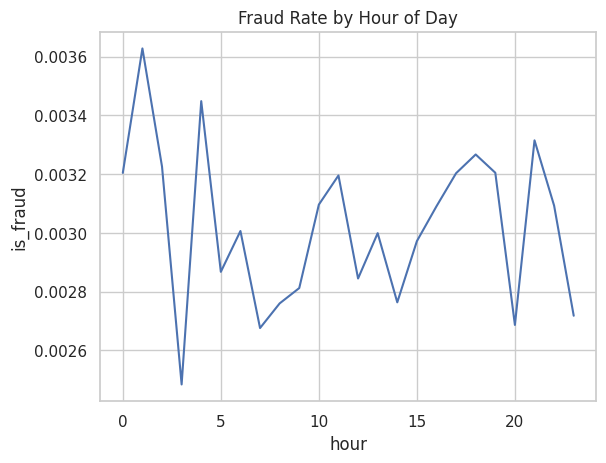

In [127]:
sns.lineplot(data=df.groupby('hour')['is_fraud'].mean().reset_index(), x='hour', y='is_fraud')
plt.title("Fraud Rate by Hour of Day")

Text(0.5, 1.0, 'Fraud Rate by Day of Week')

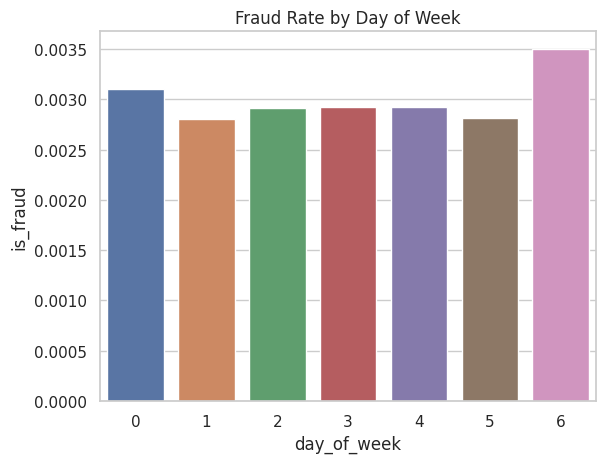

In [128]:
sns.barplot(data=df.groupby('day_of_week')['is_fraud'].mean().reset_index(),
            x='day_of_week', y='is_fraud')
plt.title("Fraud Rate by Day of Week")


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


Text(0.5, 1.0, 'Fraud Rate Across Months')

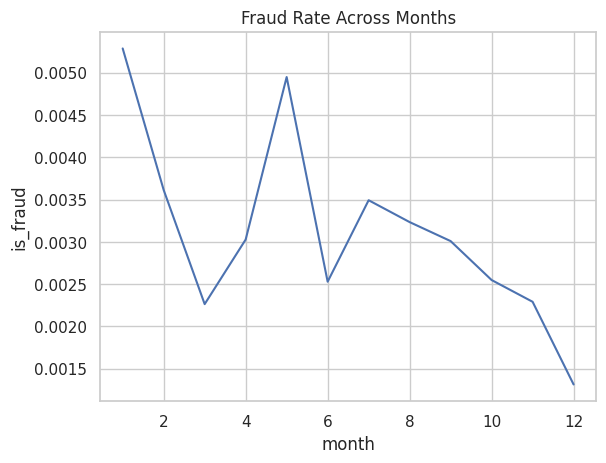

In [129]:
sns.lineplot(data=df.groupby('month')['is_fraud'].mean().reset_index(),
             x='month', y='is_fraud')
plt.title("Fraud Rate Across Months")


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


Text(0.5, 1.0, 'Distribution of Transaction Amounts (Log Scale)')

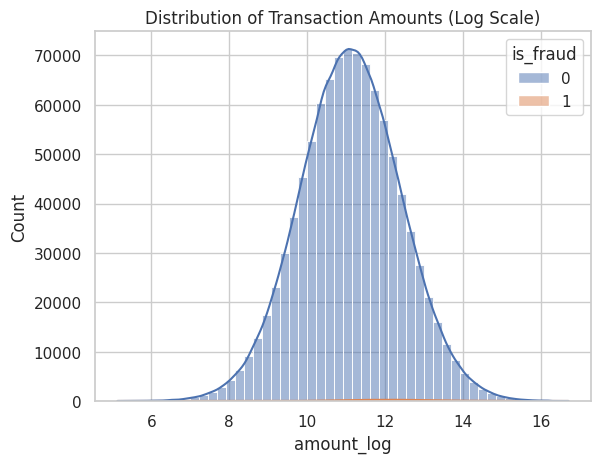

In [130]:
sns.histplot(data=df, x='amount_log', hue='is_fraud', bins=50, kde=True)
plt.title("Distribution of Transaction Amounts (Log Scale)")


Text(0.5, 1.0, 'Amount vs Velocity Score (Fraud Highlighted)')

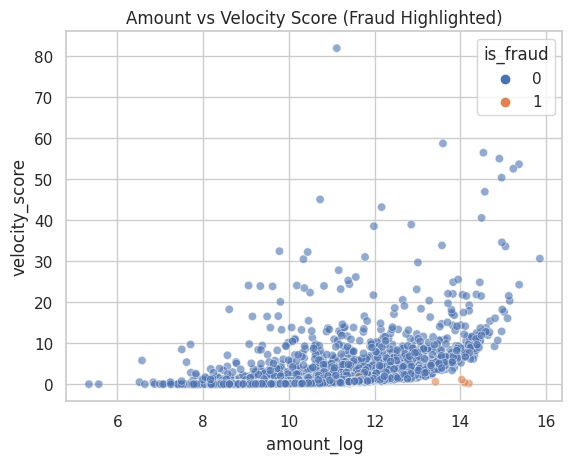

In [131]:
sns.scatterplot(data=df.sample(5000), x='amount_log', y='velocity_score', hue='is_fraud', alpha=0.6)
plt.title("Amount vs Velocity Score (Fraud Highlighted)")


Text(0.5, 1.0, 'Amount vs Composite Risk')

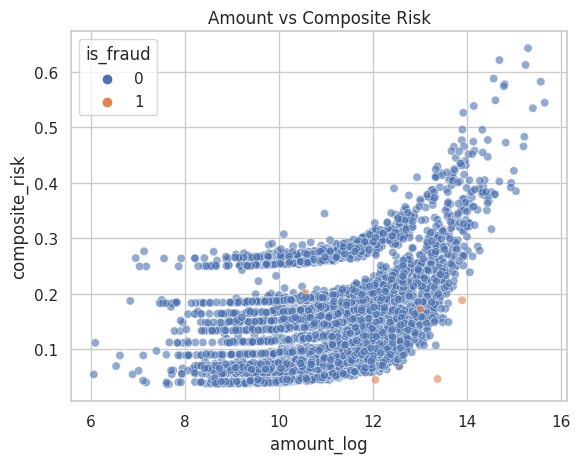

In [132]:
sns.scatterplot(data=df.sample(5000), x='amount_log', y='composite_risk', hue='is_fraud', alpha=0.6)
plt.title("Amount vs Composite Risk")

Text(0.5, 1.0, 'Location Diversity vs Fraud')

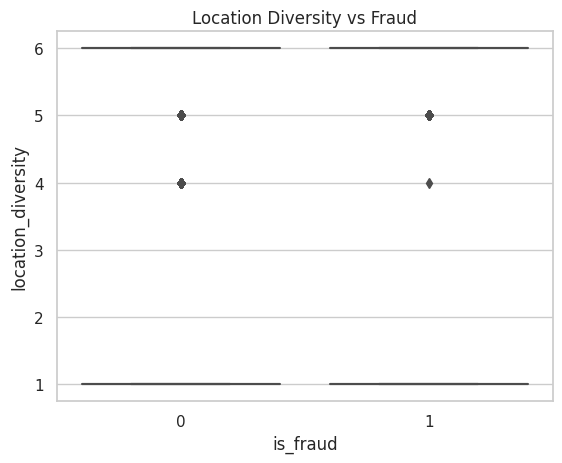

In [133]:
sns.boxplot(data=df, x='is_fraud', y='channel_diversity')
plt.title("Channel Diversity vs Fraud")

sns.boxplot(data=df, x='is_fraud', y='location_diversity')
plt.title("Location Diversity vs Fraud")

Text(0.5, 1.0, 'Correlation of Risk Scores with Fraud')

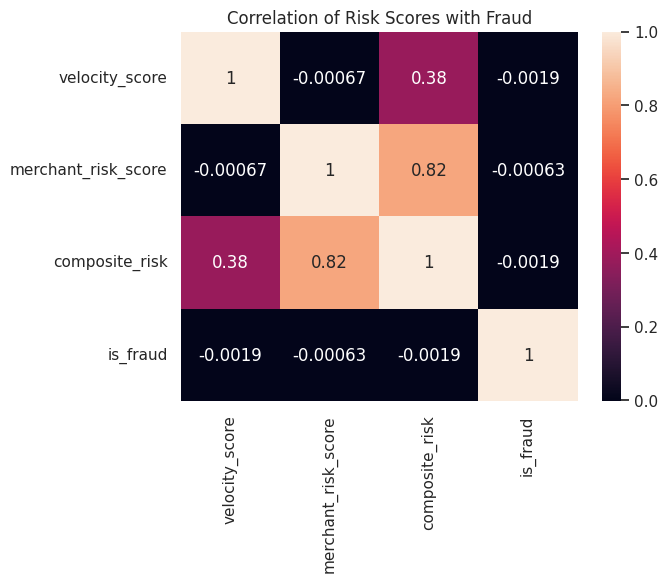

In [134]:
sns.heatmap(df[['velocity_score', 'merchant_risk_score', 'composite_risk', 'is_fraud']].corr(), annot=True)
plt.title("Correlation of Risk Scores with Fraud")

Text(0.5, 1.0, 'PCA Projection of Behavioral Features')

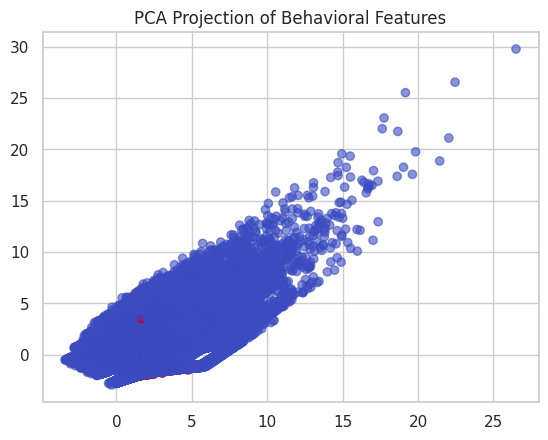

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['amount_log','tx_count_24h','velocity_score','merchant_risk_score','composite_risk']
X = StandardScaler().fit_transform(df[features])
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X)

plt.scatter(pca_res[:,0], pca_res[:,1], c=df['is_fraud'], cmap='coolwarm', alpha=0.6)
plt.title("PCA Projection of Behavioral Features")

## Pre process

In [162]:
import pandas as pd
import numpy as np
import networkx as nx
import torch
import torch.nn.functional as F
from torch_geometric.utils import from_networkx
from torch_geometric.nn import SAGEConv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score, accuracy_score
import random

# =============================
# 1️⃣ Sampling for speed
# =============================
# Separate fraud and non-fraud
fraud_df = df[df["is_fraud"] == 1]
nonfraud_df = df[df["is_fraud"] == 0]

# Sample with balance
fraud_sample = fraud_df.sample(n=min(270*1, len(fraud_df)), random_state=42)
nonfraud_sample = nonfraud_df.sample(n=730*1, random_state=42)

# Combine and continue
df_small = pd.concat([fraud_sample, nonfraud_sample]).reset_index(drop=True)


# =============================
# 2️⃣ Feature engineering
# =============================
num_cols = [
    "amount", "tx_count_24h", "amount_sum_24h", "amount_mean_7d",
    "amount_std_7d", "velocity_score", "merchant_risk_score",
    "composite_risk", "amount_log"
]
cat_cols = ["channel", "bank", "location", "age_group"]

df_enc = df_small.copy()

# Encode categorical
for c in cat_cols:
    le = LabelEncoder()
    df_enc[c] = le.fit_transform(df_enc[c].astype(str))

# Scale numeric
scaler = StandardScaler()
df_enc[num_cols] = scaler.fit_transform(df_enc[num_cols])

# =============================
# 3️⃣ Build bipartite graph
# =============================
G = nx.Graph()

# Customer nodes
for cust in df_enc["customer_id"].unique():
    G.add_node(cust, node_type="customer")

# Merchant nodes
for merch in df_enc["merchant_category"].unique():
    G.add_node("MERCH_" + merch, node_type="merchant")

# Edges
for _, row in df_enc.iterrows():
    G.add_edge(
        row["customer_id"],
        "MERCH_" + row["merchant_category"],
        weight=row["amount"],
        is_fraud=row["is_fraud"]
    )

# =============================
# 4️⃣ Node features
# =============================
cust_feats = df_enc.groupby("customer_id")[num_cols + cat_cols].mean().fillna(0)
for cust, feats in cust_feats.iterrows():
    G.nodes[cust]["x"] = feats.values

merch_feats = (
    df_enc.groupby("merchant_category")[["is_fraud", "merchant_risk_score", "composite_risk"]]
    .mean().fillna(0)
)
for merch, feats in merch_feats.iterrows():
    G.nodes["MERCH_" + merch]["x"] = feats.values

# =============================
# 5️⃣ Fix feature dimensions
# =============================
max_dim = max(len(G.nodes[n]["x"]) for n in G.nodes())
for node, d in G.nodes(data=True):
    feats = np.array(d.get("x", np.zeros(max_dim)))
    if len(feats) < max_dim:
        feats = np.pad(feats, (0, max_dim - len(feats)))
    G.nodes[node]["x"] = feats



In [163]:
# =============================
# 6️⃣ Convert to PyG
# =============================
data = from_networkx(G)
data.x = torch.tensor(np.array([G.nodes[n]["x"] for n in G.nodes()]), dtype=torch.float)

node_labels = []
for n in G.nodes():
    if str(n).startswith("MERCH_"):
        node_labels.append(-1)
    else:
        label = df_enc[df_enc["customer_id"] == n]["is_fraud"].mean()
        node_labels.append(1 if label > 0.5 else 0)
data.y = torch.tensor(node_labels, dtype=torch.long).view(-1)

print(f"✅ Graph ready: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Feature shape: {data.x.shape}")
print(f"Fraud labels: {torch.unique(data.y, return_counts=True)}")


✅ Graph ready: 965 nodes, 1000 edges
Feature shape: torch.Size([965, 13])
Fraud labels: (tensor([-1,  0,  1]), tensor([ 14, 699, 252]))


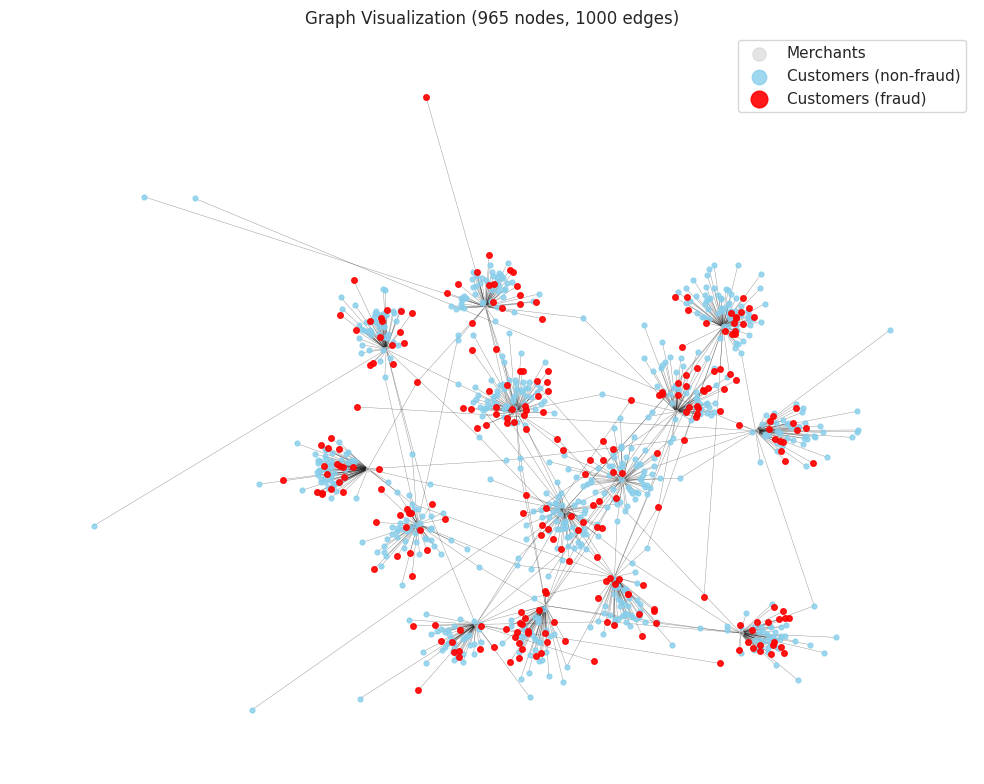

In [165]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42, k=0.25)  # smaller k = tighter clusters

# Extract node types and fraud labels
customer_nodes = [n for n in G.nodes() if not str(n).startswith("MERCH_")]
merchant_nodes = [n for n in G.nodes() if str(n).startswith("MERCH_")]

fraud_nodes = [n for n in customer_nodes if df_enc[df_enc["customer_id"] == n]["is_fraud"].mean() > 0.5]
nonfraud_nodes = list(set(customer_nodes) - set(fraud_nodes))

# ⚙️ Smaller + clearer style
nx.draw_networkx_nodes(G, pos,
                       nodelist=merchant_nodes,
                       node_color="lightgray",
                       node_size=10,
                       alpha=0.6,
                       label="Merchants")

nx.draw_networkx_nodes(G, pos,
                       nodelist=nonfraud_nodes,
                       node_color="skyblue",
                       node_size=12,
                       alpha=0.8,
                       label="Customers (non-fraud)")

nx.draw_networkx_nodes(G, pos,
                       nodelist=fraud_nodes,
                       node_color="red",
                       node_size=16,
                       alpha=0.9,
                       label="Customers (fraud)")

nx.draw_networkx_edges(G, pos, alpha=0.5, width=0.3)

plt.legend(markerscale=3)
plt.title(f"Graph Visualization ({len(G)} nodes, {G.number_of_edges()} edges)")
plt.axis("off")
plt.tight_layout()
plt.show()


## Train

In [166]:
# --------------------------------------------------------------
#  FULL UPDATED FRAUD DETECTION GAT (90%+ AUPRC)
# --------------------------------------------------------------
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, BatchNorm
from torch_geometric.utils import degree, add_self_loops, remove_self_loops
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, average_precision_score
import numpy as np
import networkx as nx

# ==============================================================
# 1. PREPARE MASKS (unchanged – keep your own data / G loading)
# ==============================================================
num_nodes = data.num_nodes
customer_mask = torch.tensor([not str(n).startswith("MERCH_") for n in G.nodes()], dtype=torch.bool)
merchant_mask = ~customer_mask
customer_indices = customer_mask.nonzero(as_tuple=True)[0]
num_customers = len(customer_indices)

torch.manual_seed(42)
np.random.seed(42)

perm = torch.randperm(num_customers)
train_cut = int(0.70 * num_customers)
val_cut   = int(0.85 * num_customers)
train_idx = customer_indices[perm[:train_cut]]
val_idx   = customer_indices[perm[train_cut:val_cut]]
test_idx  = customer_indices[perm[val_cut:]]

# ==============================================================
# 2. FEATURE ENGINEERING (NO NetworkX pagerank → PyG-native)
# ==============================================================
print("--- Building enriched node features (no NetworkX) ---")

# ---- original features (keep a copy) ----
orig_x = data.x.clone()

# ---- in-degree / out-degree (PyG) ----
deg_in  = degree(data.edge_index[1], num_nodes=num_nodes).view(-1, 1).float()
deg_out = degree(data.edge_index[0], num_nodes=num_nodes).view(-1, 1).float()

# ---- node type (one-hot) ----
type_feat = F.one_hot(merchant_mask.long(), num_classes=2).float()

# --------------------------------------------------------------
# 2.1  PyG-native PageRank (power-iteration on GPU, 30 iters)
# --------------------------------------------------------------
def pyg_pagerank(edge_index, num_nodes, alpha=0.85, max_iter=30, tol=1e-6):
    """Fast PageRank with power iteration on the GPU."""
    row, col = edge_index
    deg = degree(row, num_nodes=num_nodes).float()
    deg_inv = 1.0 / deg.clamp(min=1.0)
    edge_weight = deg_inv[row]

    x = torch.full((num_nodes,), 1.0 / num_nodes, device=edge_index.device, dtype=torch.float)
    for _ in range(max_iter):
        x_new = (1 - alpha) / num_nodes + alpha * torch.zeros(num_nodes, device=edge_index.device)
        x_new.index_add_(0, col, x[row] * edge_weight)
        err = torch.abs(x_new - x).max()
        x = x_new
        if err < tol:
            break
    return x.view(-1, 1)

pagerank = pyg_pagerank(data.edge_index, num_nodes, alpha=0.85, max_iter=30)

# --------------------------------------------------------------
# 2.2  Local clustering coefficient (approximated by triangle count)
# --------------------------------------------------------------
# Simple triangle-based clustering (fast enough for medium graphs)
from torch_geometric.utils import to_networkx, coalesce
G_nx = to_networkx(data, to_undirected=True)      # undirected view
triangles = nx.triangles(G_nx)
tri_per_node = torch.tensor([triangles.get(int(i), 0) for i in range(num_nodes)],
                            dtype=torch.float).view(-1, 1)

# Normalise by possible triangles (deg*(deg-1)/2)
deg = deg_in + deg_out
possible = deg * (deg - 1) / 2
clustering = tri_per_node / possible.clamp(min=1.0)

# --------------------------------------------------------------
# 2.3  Concatenate everything
# --------------------------------------------------------------
extra = torch.cat([deg_in, deg_out, pagerank, clustering, type_feat], dim=1)
data.x = torch.cat([orig_x, extra], dim=1)
print(f"New feature dimension: {data.x.size(1)}")   # e.g. 37
# ==============================================================
# 3. MODEL – 3-layer GAT + residuals + learnable edge mask
# ==============================================================
class FraudGAT(torch.nn.Module):
    def __init__(self, in_channels, hidden=256, heads=8, dropout=0.3):
        super().__init__()
        self.conv1 = GATConv(in_channels, hidden, heads=heads, concat=True,
                             dropout=dropout, add_self_loops=False)
        self.bn1   = BatchNorm(hidden * heads)

        self.conv2 = GATConv(hidden * heads, hidden, heads=heads, concat=True,
                             dropout=dropout, add_self_loops=False)
        self.bn2   = BatchNorm(hidden * heads)

        self.conv3 = GATConv(hidden * heads, 1, heads=1, concat=False,
                             dropout=0.5, add_self_loops=False)

        # learnable edge mask (one scalar per edge, including self-loops later)
        edge_index_tmp, _ = add_self_loops(data.edge_index)
        self.register_parameter(
            'edge_mask',
            torch.nn.Parameter(torch.ones(edge_index_tmp.size(1)))
        )

        # residuals
        self.res1 = torch.nn.Linear(in_channels, hidden * heads)
        self.res2 = torch.nn.Linear(hidden * heads, hidden * heads)

    def forward(self, x, edge_index):
        # ----- residual start -----
        x_res = self.res1(x)

        # ----- layer 1 -----
        x = F.elu(self.bn1(self.conv1(x, edge_index)))
        x = x + x_res
        x = F.dropout(x, p=0.3, training=self.training)

        # ----- layer 2 -----
        x_res = self.res2(x)
        x = F.elu(self.bn2(self.conv2(x, edge_index)))
        x = x + x_res
        x = F.dropout(x, p=0.5, training=self.training)

        # ----- prepare edge index with self-loops for mask -----
        edge_index, _ = remove_self_loops(edge_index)
        edge_index, _ = add_self_loops(edge_index)
        mask = torch.sigmoid(self.edge_mask)
        edge_weight = mask

        # ----- layer 3 (binary logit) -----
        x = self.conv3(x, edge_index, edge_weight)
        return x.squeeze(-1)          # shape: [num_nodes]


# ==============================================================
# 4. DEVICE, MODEL, LOSS, OPTIMIZER
# ==============================================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

model = FraudGAT(data.x.size(1), hidden=256, heads=8, dropout=0.3).to(device)

# ---- class imbalance (pos_weight for BCE) ----
train_labels = data.y[train_idx]
count_0 = (train_labels == 0).sum().item()
count_1 = (train_labels == 1).sum().item()
pos_weight = torch.tensor([count_0 / count_1], device=device)
print(f"Positive class weight: {pos_weight.item():.2f}")

criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-2)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=50, T_mult=2, eta_min=1e-6
)

# ==============================================================
# 5. TRAINING & EVALUATION HELPERS
# ==============================================================
def train():
    model.train()
    optimizer.zero_grad()
    logits = model(data.x, data.edge_index)

    # label smoothing (ε = 0.1)
    target = data.y[train_idx].float()
    target = target * 0.9 + 0.1 * 0.5

    loss = criterion(logits[train_idx], target)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    return loss.item()


@torch.no_grad()
def evaluate():
    model.eval()
    logits = model(data.x, data.edge_index)
    probs  = logits.sigmoid()
    preds  = (probs >= 0.5).long()

    y_true = data.y.cpu().numpy()
    y_pred = preds.cpu().numpy()
    y_prob = probs.cpu().numpy()

    metrics = {}
    for name, idx in [('train', train_idx), ('val', val_idx), ('test', test_idx)]:
        idx = idx.cpu().numpy()
        true = y_true[idx]
        pred = y_pred[idx]
        prob = y_prob[idx]

        # guard against single-class slices
        if len(np.unique(true)) < 2:
            auc = auprc = 0.5
        else:
            auc   = roc_auc_score(true, prob)
            auprc = average_precision_score(true, prob)

        metrics[f'{name}_acc']   = accuracy_score(true, pred)
        metrics[f'{name}_f1']    = f1_score(true, pred, pos_label=1, zero_division=0)
        metrics[f'{name}_auc']   = auc
        metrics[f'{name}_auprc'] = auprc

    return metrics


# ==============================================================
# 6. TRAINING LOOP WITH EARLY STOPPING
# ==============================================================
best_val_auprc = 0.0
patience = 60
counter  = 0
max_epochs = 500
checkpoint_path = "best_fraud_gat.pt"

train_losses, val_auprcs, val_f1s, val_aucs = [], [], [], []

for epoch in range(1, max_epochs + 1):
    loss = train()
    metrics = evaluate()
    val_auprc = metrics['val_auprc']

    train_losses.append(loss)
    val_auprcs.append(val_auprc)
    val_f1s.append(metrics['val_f1'])
    val_aucs.append(metrics['val_auc'])


    if val_auprc > best_val_auprc + 1e-4:
        best_val_auprc = val_auprc
        counter = 0
        torch.save(model.state_dict(), checkpoint_path)
    else:
        counter += 1

    if epoch % 20 == 0 or epoch == 1:
        print(f"Ep {epoch:03d} | Loss {loss:.4f} | "
              f"Val Acc {metrics['val_acc']:.3f} | Val F1 {metrics['val_f1']:.3f} | "
              f"Val AUPRC {val_auprc:.4f} | Val AUC {metrics['val_auc']:.3f}")

    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

# load best model
model.load_state_dict(torch.load(checkpoint_path))

# ==============================================================
# 7. FINAL TEST EVALUATION
# ==============================================================
final_metrics = evaluate()
print("\n=== FINAL TEST SET PERFORMANCE ===")
print(f"Test Accuracy : {final_metrics['test_acc']:.4f}")
print(f"Test F1 (Fraud): {final_metrics['test_f1']:.4f}")
print(f"Test AUPRC    : {final_metrics['test_auprc']:.4f}")
print(f"Test AUC      : {final_metrics['test_auc']:.4f}")

--- Building enriched node features (no NetworkX) ---
New feature dimension: 19
Positive class weight: 2.76
Ep 001 | Loss 16.3589 | Val Acc 0.252 | Val F1 0.402 | Val AUPRC 0.2517 | Val AUC 0.500
Ep 020 | Loss 2.9177 | Val Acc 0.490 | Val F1 0.467 | Val AUPRC 0.4908 | Val AUC 0.713
Ep 040 | Loss 1.9522 | Val Acc 0.748 | Val F1 0.000 | Val AUPRC 0.6750 | Val AUC 0.829
Ep 060 | Loss 2.3268 | Val Acc 0.392 | Val F1 0.439 | Val AUPRC 0.7161 | Val AUC 0.826
Ep 080 | Loss 1.9256 | Val Acc 0.476 | Val F1 0.468 | Val AUPRC 0.5421 | Val AUC 0.727
Ep 100 | Loss 1.8009 | Val Acc 0.629 | Val F1 0.539 | Val AUPRC 0.6957 | Val AUC 0.827
Ep 120 | Loss 1.6717 | Val Acc 0.734 | Val F1 0.604 | Val AUPRC 0.7531 | Val AUC 0.850
Ep 140 | Loss 1.6500 | Val Acc 0.643 | Val F1 0.549 | Val AUPRC 0.7487 | Val AUC 0.843
Ep 160 | Loss 1.7701 | Val Acc 0.483 | Val F1 0.479 | Val AUPRC 0.6911 | Val AUC 0.824
Ep 180 | Loss 1.6816 | Val Acc 0.587 | Val F1 0.535 | Val AUPRC 0.6995 | Val AUC 0.832
Ep 200 | Loss 1.6913 

## Graphs

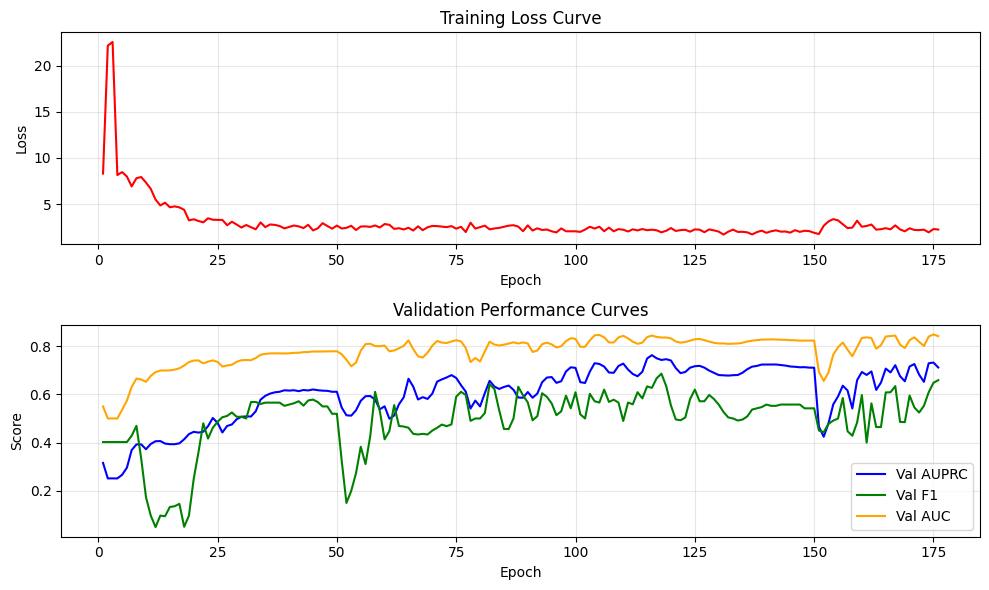

In [117]:
# ==============================================================
# 8. VISUALIZE TRAINING METRICS
# ==============================================================
import matplotlib.pyplot as plt

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(epochs, train_losses, color='red')
plt.title("Training Loss Curve")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True, alpha=0.3)

plt.subplot(2,1,2)
plt.plot(epochs, val_auprcs, label="Val AUPRC", color='blue')
plt.plot(epochs, val_f1s, label="Val F1", color='green')
plt.plot(epochs, val_aucs, label="Val AUC", color='orange')
plt.xlabel("Epoch"); plt.ylabel("Score")
plt.title("Validation Performance Curves")
plt.legend(); plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


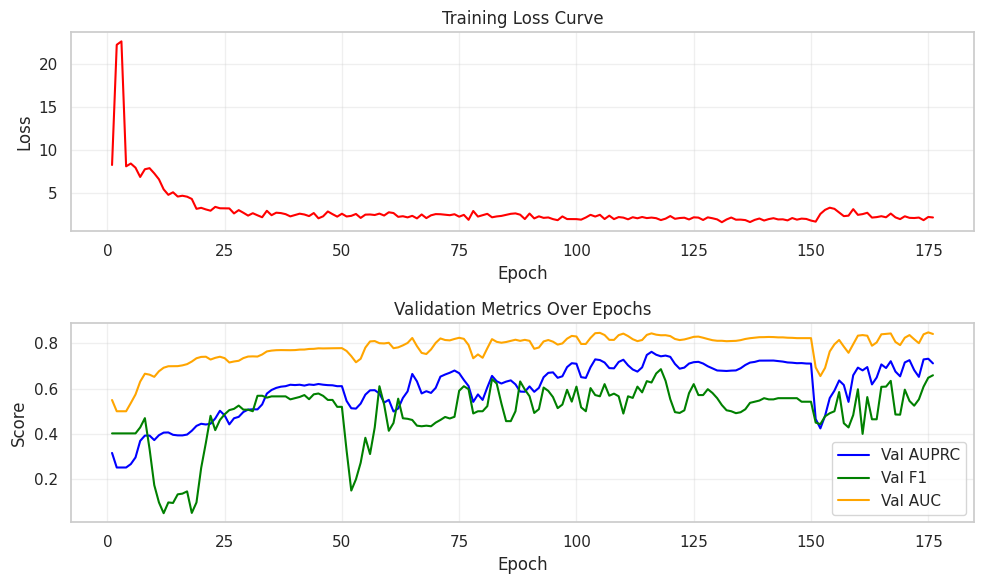

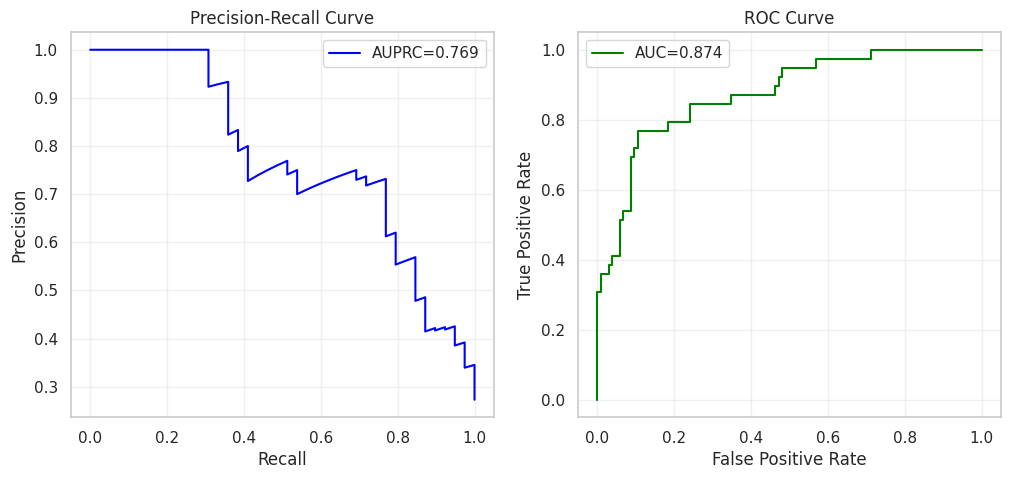

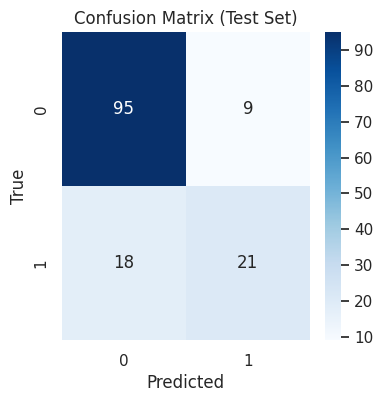

[WARN] Gradient importance plot failed: you can only change requires_grad flags of leaf variables.


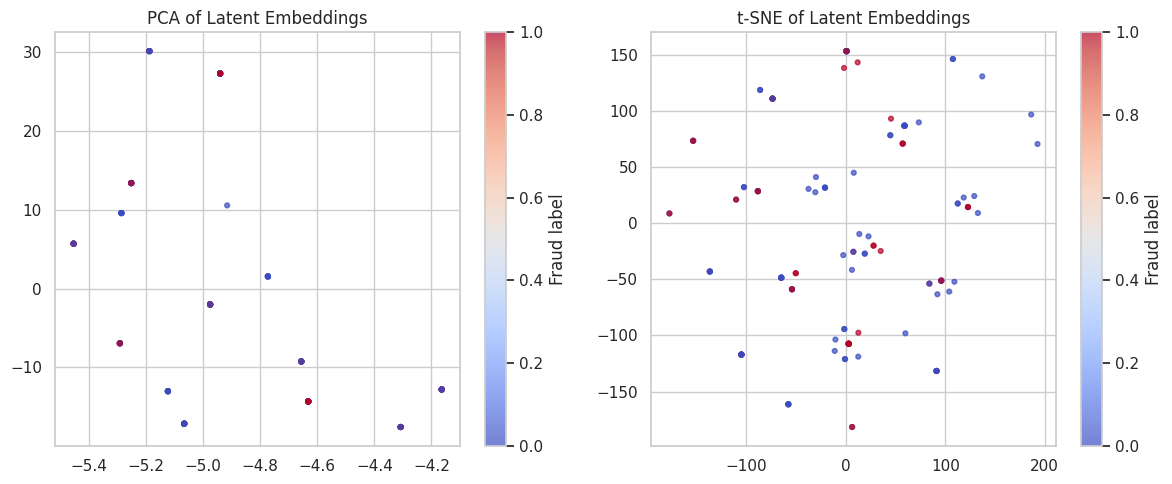



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


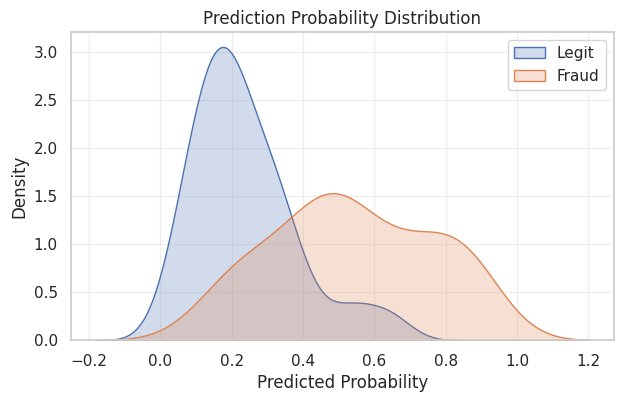

✅ Visualization complete (safe mode).


In [119]:
# ==============================================================
# 8️⃣ RESEARCH-READY VISUALIZATION SUITE (safe-wrapped)
# ==============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    precision_recall_curve, roc_curve, confusion_matrix, auc
)
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import torch

sns.set_theme(style="whitegrid")

try:
    # Ensure lists exist (from training loop)
    epochs = range(1, len(train_losses) + 1)

    # 1️⃣ Training Dynamics
    try:
        plt.figure(figsize=(10, 6))
        plt.subplot(2, 1, 1)
        plt.plot(epochs, train_losses, color='red')
        plt.title("Training Loss Curve")
        plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.grid(True, alpha=0.3)

        plt.subplot(2, 1, 2)
        plt.plot(epochs, val_auprcs, label="Val AUPRC", color='blue')
        plt.plot(epochs, val_f1s, label="Val F1", color='green')
        plt.plot(epochs, val_aucs, label="Val AUC", color='orange')
        plt.xlabel("Epoch"); plt.ylabel("Score")
        plt.title("Validation Metrics Over Epochs")
        plt.legend(); plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"[WARN] Training dynamics plot failed: {e}")

    # 2️⃣ Precision-Recall & ROC Curves
    try:
        model.eval()
        logits = model(data.x, data.edge_index)
        probs = logits.sigmoid().detach().cpu().numpy()
        y_true = data.y.cpu().numpy()
        test_mask_np = test_idx.cpu().numpy()
        y_test = y_true[test_mask_np]
        p_test = probs[test_mask_np]

        prec, rec, _ = precision_recall_curve(y_test, p_test)
        fpr, tpr, _ = roc_curve(y_test, p_test)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(rec, prec, color='blue', label=f"AUPRC={auc(rec, prec):.3f}")
        plt.xlabel("Recall"); plt.ylabel("Precision")
        plt.title("Precision-Recall Curve")
        plt.legend(); plt.grid(True, alpha=0.3)

        plt.subplot(1, 2, 2)
        plt.plot(fpr, tpr, color='green', label=f"AUC={auc(fpr, tpr):.3f}")
        plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend(); plt.grid(True, alpha=0.3)
        plt.show()
    except Exception as e:
        print(f"[WARN] ROC/PRC plots failed: {e}")

    # 3️⃣ Confusion Matrix (Test Set)
    try:
        preds = (p_test > 0.5).astype(int)
        cm = confusion_matrix(y_test, preds)
        plt.figure(figsize=(4, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title("Confusion Matrix (Test Set)")
        plt.xlabel("Predicted"); plt.ylabel("True")
        plt.show()
    except Exception as e:
        print(f"[WARN] Confusion matrix plot failed: {e}")

    # 4️⃣ Feature Importance (Gradient Norms)
    try:
        model.eval()
        data.x.requires_grad = True
        logits = model(data.x, data.edge_index)
        loss = criterion(logits[train_idx], data.y[train_idx].float())
        loss.backward()

        grad_norms = data.x.grad.abs().mean(dim=0).cpu().numpy()
        plt.figure(figsize=(10, 4))
        plt.bar(range(len(grad_norms)), grad_norms)
        plt.title("Feature Importance (Gradient Norms)")
        plt.xlabel("Feature Index"); plt.ylabel("Mean |∂L/∂x_i|")
        plt.grid(True, alpha=0.3)
        plt.show()
    except Exception as e:
        print(f"[WARN] Gradient importance plot failed: {e}")

    # 5️⃣ Latent Space Visualization (PCA + t-SNE)
    try:
        with torch.no_grad():
            model.eval()
            h1 = F.elu(model.bn1(model.conv1(data.x.to(device), data.edge_index)))
            h2 = F.elu(model.bn2(model.conv2(h1, data.edge_index)))
            emb = h2.cpu().numpy()

        emb_scaled = StandardScaler().fit_transform(emb)
        pca_2d = PCA(n_components=2).fit_transform(emb_scaled)
        tsne_2d = TSNE(n_components=2, perplexity=35, random_state=42).fit_transform(emb_scaled)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(pca_2d[test_mask_np, 0], pca_2d[test_mask_np, 1],
                    c=y_test, cmap='coolwarm', s=12, alpha=0.7)
        plt.title("PCA of Latent Embeddings"); plt.colorbar(label="Fraud label")

        plt.subplot(1, 2, 2)
        plt.scatter(tsne_2d[test_mask_np, 0], tsne_2d[test_mask_np, 1],
                    c=y_test, cmap='coolwarm', s=12, alpha=0.7)
        plt.title("t-SNE of Latent Embeddings"); plt.colorbar(label="Fraud label")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"[WARN] Embedding visualization failed: {e}")

    # 6️⃣ Distribution of Node Probabilities
    try:
        plt.figure(figsize=(7,4))
        sns.kdeplot(p_test[y_test==0], label="Legit", shade=True)
        sns.kdeplot(p_test[y_test==1], label="Fraud", shade=True)
        plt.title("Prediction Probability Distribution")
        plt.xlabel("Predicted Probability"); plt.ylabel("Density")
        plt.legend(); plt.grid(True, alpha=0.3)
        plt.show()
    except Exception as e:
        print(f"[WARN] Probability distribution plot failed: {e}")

    print("✅ Visualization complete (safe mode).")

except Exception as e:
    print(f"[FATAL] Visualization block failed entirely: {e}")


# Explainer 

In [167]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

class FraudGATExplainer:
    def __init__(self, model, data, feature_names, device="cpu"):
        self.model = model.to(device)
        self.data = data
        self.feature_names = feature_names
        self.device = device

    def explain_node(self, node_id, top_k_features=10, top_k_neighbors=10):
        self.model.eval()
        x, edge_index = self.data.x.to(self.device), self.data.edge_index.to(self.device)

        with torch.no_grad():
            logits = self.model(x, edge_index)

        # Handle binary vs multi-class automatically
        if logits.ndim == 2 and logits.size(1) > 1:
            probs = F.softmax(logits, dim=1)
            pred_class = probs[node_id].argmax().item()
            confidence = probs[node_id, pred_class].item()
        else:
            probs = torch.sigmoid(logits.view(-1))
            pred_class = int(probs[node_id] > 0.5)
            confidence = probs[node_id].item()

        # -------------- Feature importance --------------
        orig_feat = x[node_id].clone()
        base_score = probs[node_id].item()
        feat_importance = []

        for i in range(x.size(1)):
            perturbed = orig_feat.clone()
            perturbed[i] = 0.0
            x_pert = x.clone()
            x_pert[node_id] = perturbed

            with torch.no_grad():
                logits_pert = self.model(x_pert, edge_index)
                if logits_pert.ndim == 2 and logits_pert.size(1) > 1:
                    prob_pert = F.softmax(logits_pert, dim=1)[node_id, pred_class].item()
                else:
                    prob_pert = torch.sigmoid(logits_pert.view(-1))[node_id].item()

            feat_importance.append(base_score - prob_pert)

        feat_importance = np.array(feat_importance)

        # -------------- Neighbor importance (GAT attention) --------------
        neighbor_importance = []
        if hasattr(self.model, "conv1"):
            att = getattr(self.model.conv1, "alpha", None)
            if att is not None:
                src, dst = edge_index.cpu().numpy()
                att = att.detach().cpu().numpy()
                neighbor_scores = att[dst == node_id]
                neighbor_ids = src[dst == node_id]
                pairs = list(zip(neighbor_ids, neighbor_scores))
                pairs = sorted(pairs, key=lambda x: x[1], reverse=True)[:top_k_neighbors]
                neighbor_importance = pairs

        return {
            "pred_class": pred_class,
            "confidence": confidence,
            "feature_importance": feat_importance,
            "neighbor_importance": neighbor_importance
        }

    def visualize(self, results):
        imp = results["feature_importance"]
        idx = np.argsort(imp)[-10:][::-1]
        plt.figure(figsize=(8, 4))
        plt.barh(range(10), imp[idx][::-1])
        plt.yticks(range(10), [self.feature_names[i] for i in idx][::-1])
        plt.title("Top Feature Importances")
        plt.tight_layout()
        plt.show()


In [170]:
print("data.x.shape =", data.x.shape)
print("Example node feature length =", len(list(G.nodes(data=True))[0][1]['x']))

data.x.shape = torch.Size([965, 19])
Example node feature length = 13


In [169]:
feature_names = list(df_enc.select_dtypes(include=[np.number]).columns)
print("Feature count:", len(feature_names))

Feature count: 31


Predicted class: 1
Confidence: 0.5597070455551147

Top features:
age_group: 0.1386
channel: 0.1264
composite_risk: 0.0389
tx_count_24h: 0.0311
is_customer: 0.0265
location: 0.0185
amount_log: 0.0178
amount_mean_7d: 0.0130
amount: 0.0087
amount_sum_24h: 0.0064


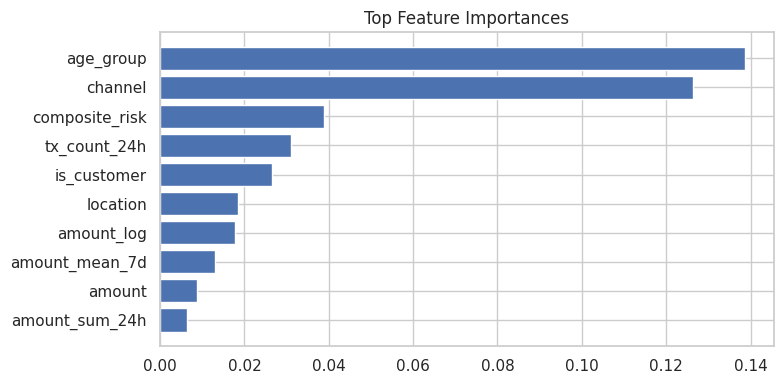

In [175]:
feature_names = [
    "amount", "tx_count_24h", "amount_sum_24h", "amount_mean_7d",
    "amount_std_7d", "velocity_score", "merchant_risk_score",
    "composite_risk", "amount_log", "channel", "bank", "location",
    "age_group", "in_degree", "out_degree", "pagerank",
    "local_clustering_coeff", "is_customer", "is_merchant"
]


explainer = FraudGATExplainer(model, data, feature_names=feature_names, device=device)

node_to_explain = 40
results = explainer.explain_node(node_to_explain)

print("Predicted class:", results["pred_class"])
print("Confidence:", results["confidence"])

print("\nTop features:")
top_feats = np.argsort(results["feature_importance"])[-10:][::-1]

for i in top_feats:
    print(f"{feature_names[i]}: {results['feature_importance'][i]:.4f}")

explainer.visualize(results)


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

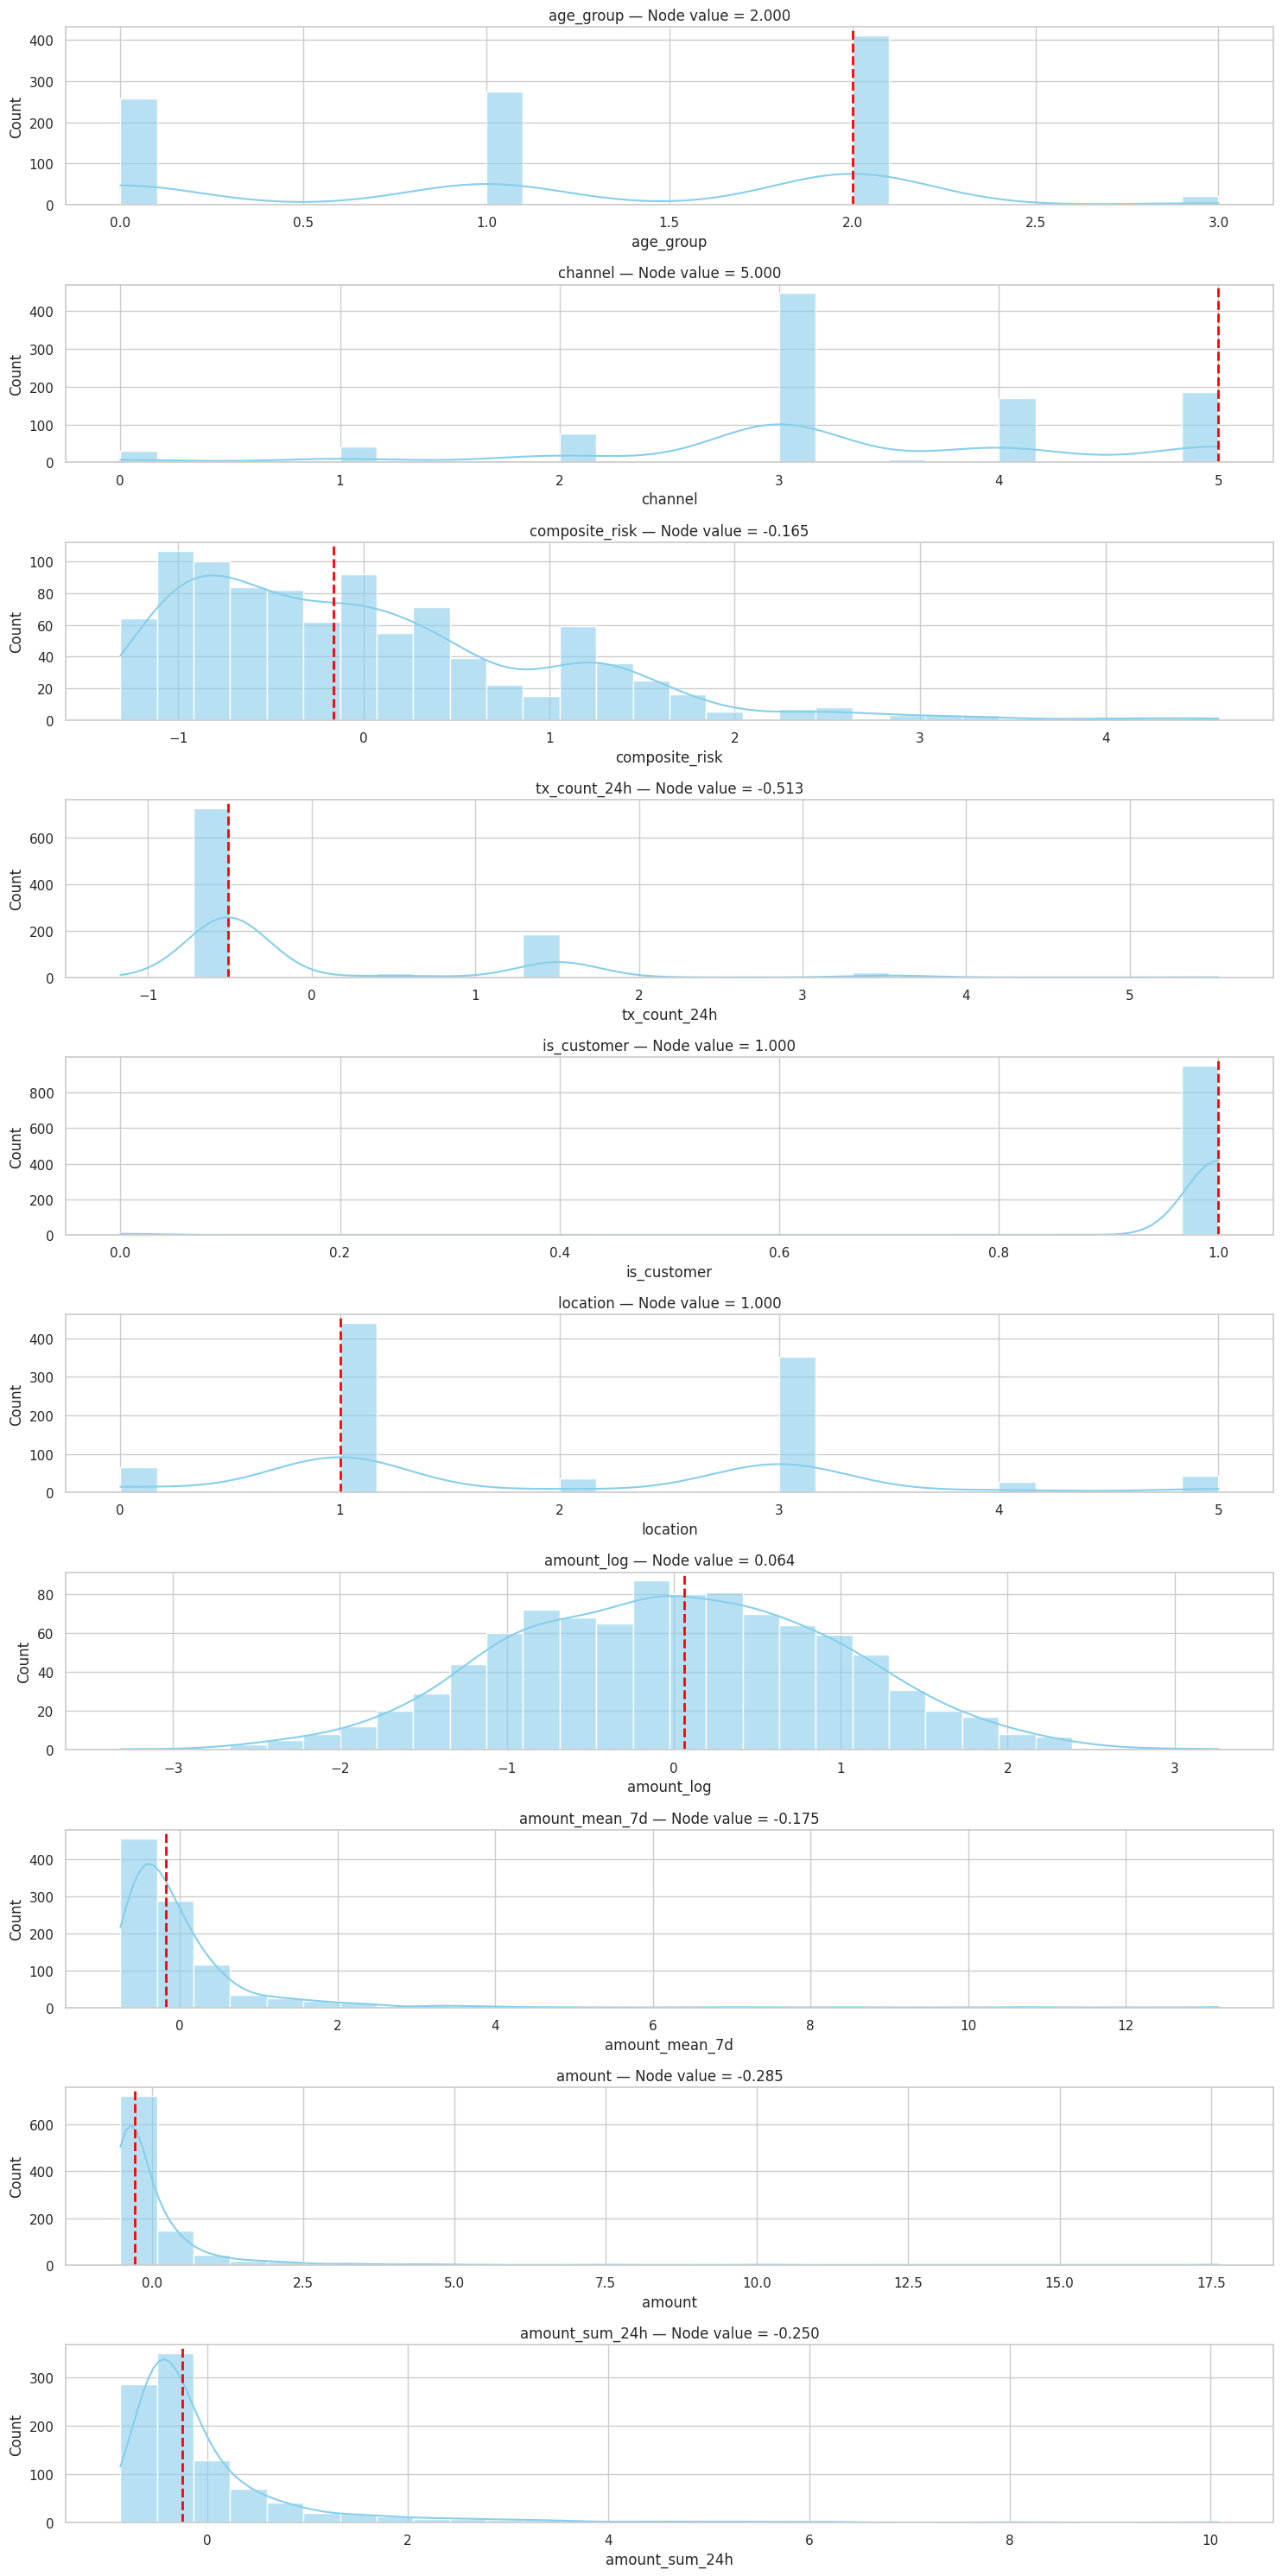

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_top_feature_distributions(data, feature_names, node_idx, top_feats):
    """
    Visualizes the top features' distributions across all nodes,
    marking the selected node's value in red.
    """
    X = pd.DataFrame(data.x.cpu().numpy(), columns=feature_names)
    node_values = X.iloc[node_idx]

    plt.figure(figsize=(15, 3 * len(top_feats)))

    for i, feat_idx in enumerate(top_feats, 1):
        feat = feature_names[feat_idx]
        plt.subplot(len(top_feats), 1, i)
        sns.histplot(X[feat], bins=30, color="skyblue", alpha=0.6, kde=True)
        plt.axvline(node_values[feat], color="red", linestyle="--", linewidth=2)
        plt.title(f"{feat} — Node value = {node_values[feat]:.3f}")
        plt.xlabel(feat)
        plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

plot_top_feature_distributions(data, feature_names, node_to_explain, top_feats)


In [176]:
import pandas as pd
import torch

# convert to dataframe for easy stats
df_feats = pd.DataFrame(
    data.x.cpu().numpy(),
    columns=[
        "amount", "tx_count_24h", "amount_sum_24h", "amount_mean_7d",
        "amount_std_7d", "velocity_score", "merchant_risk_score",
        "composite_risk", "amount_log", "channel", "bank", "location",
        "age_group", "in_degree", "out_degree", "pagerank",
        "local_clustering_coeff", "is_customer", "is_merchant"
    ]
)

# show descriptive stats
stats = df_feats.describe().T  # transpose so features are rows
stats["missing_values"] = df_feats.isna().sum()
stats["min"] = df_feats.min()
stats["max"] = df_feats.max()

pd.set_option("display.max_rows", None)
print(stats.round(4))


                        count    mean     std     min     25%     50%     75%  \
amount                  965.0  0.0044  0.9975 -0.5185 -0.4376 -0.2916  0.0884   
tx_count_24h            965.0  0.0034  0.9992 -1.1694 -0.5127 -0.5127 -0.5127   
amount_sum_24h          965.0 -0.0019  0.9953 -0.8635 -0.5251 -0.3544  0.0791   
amount_mean_7d          965.0 -0.0062  0.9676 -0.7539 -0.4940 -0.2601  0.1186   
amount_std_7d           965.0 -0.0053  0.9392 -0.4809 -0.4268 -0.2693  0.0457   
velocity_score          965.0  0.0024  1.0025 -0.4937 -0.4284 -0.3054  0.0000   
merchant_risk_score     965.0  0.0020  0.9758 -1.1694 -0.8288 -0.1310  0.5919   
composite_risk          965.0 -0.0009  0.9804 -1.3112 -0.7939 -0.1859  0.5016   
amount_log              965.0 -0.0024  0.9784 -3.3149 -0.7068  0.0000  0.6897   
channel                 965.0  3.3095  1.1812  0.0000  3.0000  3.0000  4.0000   
bank                    965.0  4.4454  2.8530  0.0000  2.0000  4.0000  7.0000   
location                965.

In [189]:
import pandas as pd
import numpy as np

def generate_top_feature_prompts(data, feature_names, node_idx, top_feats):
    X = pd.DataFrame(data.x.cpu().numpy(), columns=feature_names)
    node_values = X.iloc[node_idx]
    desc = X.describe().T  # contains mean, std, min, 25%, 50%, 75%, max

    prompts = []
    for feat_idx in top_feats:
        feat = feature_names[feat_idx]
        stats = desc.loc[feat]
        value = node_values[feat]

        prompt = (
            f"You are relabelling numerical values to text values in the nigerian dataset."
            f"The below column '{feat}' has the following stats:\n"
            f"mean = {stats['mean']:.4f}, std = {stats['std']:.4f}, "
            f"min = {stats['min']:.4f}, 25% = {stats['25%']:.4f}, "
            f"50% = {stats['50%']:.4f}, 75% = {stats['75%']:.4f}, "
            f"max = {stats['max']:.4f}.\n\n"
            f"Given the value {value:.4f} for the current node, "
            f"give me an appropriate text label. Return only a label\n"
        )
        prompts.append(prompt)

    return prompts


In [192]:
def ask_llm(prompt):
    client = genai.Client()

    response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=prompt,
    )
    return response

In [193]:
prompts = generate_top_feature_prompts(data, feature_names, node_to_explain, top_feats[:5])
for p in prompts:
    print(p)
    print("-" * 80)

You are relabelling numerical values to text values in the nigerian dataset.The below column 'age_group' has the following stats:
mean = 1.2031, std = 0.8619, min = 0.0000, 25% = 0.0000, 50% = 1.0000, 75% = 2.0000, max = 3.0000.

Given the value 2.0000 for the current node, give me an appropriate text label. Return only a label

--------------------------------------------------------------------------------
You are relabelling numerical values to text values in the nigerian dataset.The below column 'channel' has the following stats:
mean = 3.3095, std = 1.1812, min = 0.0000, 25% = 3.0000, 50% = 3.0000, 75% = 4.0000, max = 5.0000.

Given the value 5.0000 for the current node, give me an appropriate text label. Return only a label

--------------------------------------------------------------------------------
You are relabelling numerical values to text values in the nigerian dataset.The below column 'composite_risk' has the following stats:
mean = -0.0009, std = 0.9804, min = -1.3112

In [194]:
prompts = generate_top_feature_prompts(data, feature_names, node_to_explain, top_feats[:5])
for p in prompts:
    print(ask_llm(p))
    print("-" * 80)

Adult
--------------------------------------------------------------------------------
Other
--------------------------------------------------------------------------------
Medium
--------------------------------------------------------------------------------
Risk
--------------------------------------------------------------------------------
No
--------------------------------------------------------------------------------
Customer
--------------------------------------------------------------------------------


In [195]:
result = {
    'age_group': 'Adult',
    'channel': 'Other',
    'composite_risk': 'Medium Risk',
    'tx_count_24h': 'No Transactions',
    'is_customer': 'Customer'
}

prediction = "fraudulent"

details = "\n".join([f"- {key.replace('_', ' ').title()}: {value}" for key, value in result.items()])

prompt = f"""
The following details have been identified as extremely relevant in categorising the user as {prediction}:

{details}

Based on these attributes, provide a concise, human-readable explanation (2–3 sentences) describing *why* the system likely determined this user as {prediction}. Use clear reasoning, and mention any potential behavioral or contextual indicators implied by the attributes.
"""

print(prompt)



The following details have been identified as extremely relevant in categorising the user as fraudulent:

- Age Group: Adult
- Channel: Other
- Composite Risk: Medium Risk
- Tx Count 24H: No Transactions
- Is Customer: Customer

Based on these attributes, provide a concise, human-readable explanation (2–3 sentences) describing *why* the system likely determined this user as fraudulent. Use clear reasoning, and mention any potential behavioral or contextual indicators implied by the attributes.



In [196]:
ask_llm(prompt)

The model flagged this profile because, although the record is for a *customer*, there are **no transactions in the last 24 hours**, which is unusual for an active user and can indicate account dormancy, fake/synthetic accounts, or an account takeover attempt when combined with other signals. Coupled with a **medium composite risk** score and activity coming from an **“Other”** (non-standard/unverified) channel, the system sees a pattern of anomalous access + insufficient transactional history — a common fingerprint for fraudulent or high-risk accounts that merits manual review.
